In [1]:
import warnings
warnings.filterwarnings('ignore')

# Implement a KNN model to classify the animals in to categories


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# KNN-

## Introduction

K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

Non -Parametric: In KNN, there is no predefined form of the mapping function

In [3]:
zoo = pd.read_csv('zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.shape

(101, 18)

In [5]:
## Checking null values and DType

zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


As we see no null values in dataset

In [6]:
# Checking Duplicate values

zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


No Duplicate values in data

In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


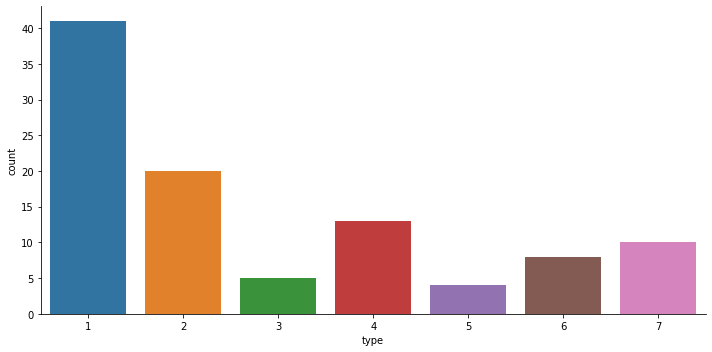

In [8]:
sns.factorplot('type', data=zoo, kind='count', size=5, aspect=2)
plt.show()

**Almost all in animals lies in type-1 categories**

## Building Model

In [9]:
X = zoo.drop(['animal name','type'],axis=1)
y = zoo[['type']]

In [10]:
## Train Test Split 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

In [11]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((80, 16), (21, 16), (80, 1), (21, 1))

### Model Training_Testing_Evaluating

**Generating modek with k =3**

#### KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [13]:
print('accuracy score of training model_1 =' , accuracy_score(y_train,y_train_pred))

print('accuracy score of test model_1 =' , accuracy_score(y_test,y_test_pred))

accuracy score of training model_1 = 0.975
accuracy score of test model_1 = 0.9523809523809523


# with STANDARDIZED DATA

### Generating a model with k=3

In [14]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((80, 16), (80, 1), (21, 16), (21, 1))

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [17]:
print('accuracy score of training model_2 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_2     :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_2 : 0.9625
accuracy score of test model_2     : 0.9523809523809523


### Generating a model with k=4

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [19]:
print('accuracy score of training model_3 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_3     :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_3 : 0.9375
accuracy score of test model_3     : 0.9523809523809523


### Generating a model with k=5

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [21]:
print('accuracy score of training model_4 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_4    :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_4 : 0.9625
accuracy score of test model_4    : 1.0


## CV Score (Cross val score)

In [22]:
neighbors = list(range(1,50,2))
cv_scores = []

for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = i)                         #print(i)
    cv_score = cross_val_score(estimator = knn_model,X=scaledX,y=y,cv=10)     #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [23]:
cv_scores

[0.9509090909090909,
 0.93,
 0.9400000000000001,
 0.9200000000000002,
 0.89,
 0.860909090909091,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.8418181818181818,
 0.8218181818181819,
 0.8218181818181819,
 0.7918181818181818,
 0.7918181818181818,
 0.7827272727272728,
 0.7727272727272728,
 0.7327272727272728,
 0.7127272727272727,
 0.6827272727272726,
 0.6727272727272726,
 0.6527272727272726,
 0.6327272727272726,
 0.6127272727272727,
 0.5636363636363637]

In [24]:
neighbors[cv_scores.index(max(cv_scores))]

1

## Visualizing the KNeighbors wrt CV

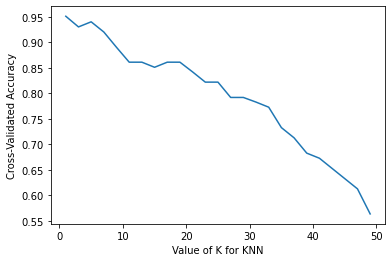

In [25]:
plt.plot(neighbors,cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [26]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524
